In [1]:
from PIL import Image
import numpy as np
import math
from scipy import signal
import cv2
from IPython.display import Image

In [2]:
def boxfilter(n):
  assert(n % 2 != 0), "Dimension must be odd"
  # initiate an n x n matrix and then filled with 1/(n^2)
  filter = np.full((n, n), 1/pow(n,2))
  return filter

In [3]:
boxfilter(3)

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [4]:
# This is meant to be failed by throwing AssertionError
boxfilter(4)

AssertionError: Dimension must be odd

In [5]:
boxfilter(5)

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

In [6]:
# if num is odd or not integer, round it up
# if num is even, add one
def odd(num):
  if math.ceil(num) % 2 != 0:
    return math.ceil(num)
  else:
    return math.ceil(num) + 1

In [7]:
# gauss = e^(-x^2/(2*sigma^2))
def gauss(x, sigma):
  return math.exp(-pow(x, 2) / (2 * pow(sigma, 2)))

In [8]:
def gauss1d(sigma):
  # determine the length of the x array
  length = odd(sigma * 6)
  x_array = np.arange(-(length-1)/2, (length-1)/2+1, dtype = int)
  # apply the gaussian functino to every element in the x array
  gauss_array = np.array([gauss(x, sigma) for x in x_array])
  # nomalize the gaussian filter so that all the element in the filter add to 1
  gauss_norm_array = gauss_array/np.sum(gauss_array)
  return gauss_norm_array

In [9]:
gauss1d(0.3)

array([0.00383626, 0.99232748, 0.00383626])

In [10]:
gauss1d(0.5)

array([0.10650698, 0.78698604, 0.10650698])

In [11]:
gauss1d(1)

array([0.00443305, 0.05400558, 0.24203623, 0.39905028, 0.24203623,
       0.05400558, 0.00443305])

In [12]:
gauss1d(2)

array([0.0022182 , 0.00877313, 0.02702316, 0.06482519, 0.12110939,
       0.17621312, 0.19967563, 0.17621312, 0.12110939, 0.06482519,
       0.02702316, 0.00877313, 0.0022182 ])

In [13]:
def gauss2d(sigma):
  # generate a 1d gaussian filter by the sigma
  gauss_1d_array = gauss1d(sigma)
  # generate 2d version based on the 1d gaussian array
  gauss_2d_1d_array = gauss_1d_array[np.newaxis, :]
  # calculate the convolution of gaussian array with its transpose
  gauss_2d_array = signal.convolve2d(gauss_2d_1d_array, np.transpose(gauss_2d_1d_array))
  return gauss_2d_array

In [14]:
gauss2d(0.5)

array([[0.01134374, 0.08381951, 0.01134374],
       [0.08381951, 0.61934703, 0.08381951],
       [0.01134374, 0.08381951, 0.01134374]])

In [15]:
gauss2d(1)

array([[1.96519161e-05, 2.39409349e-04, 1.07295826e-03, 1.76900911e-03,
        1.07295826e-03, 2.39409349e-04, 1.96519161e-05],
       [2.39409349e-04, 2.91660295e-03, 1.30713076e-02, 2.15509428e-02,
        1.30713076e-02, 2.91660295e-03, 2.39409349e-04],
       [1.07295826e-03, 1.30713076e-02, 5.85815363e-02, 9.65846250e-02,
        5.85815363e-02, 1.30713076e-02, 1.07295826e-03],
       [1.76900911e-03, 2.15509428e-02, 9.65846250e-02, 1.59241126e-01,
        9.65846250e-02, 2.15509428e-02, 1.76900911e-03],
       [1.07295826e-03, 1.30713076e-02, 5.85815363e-02, 9.65846250e-02,
        5.85815363e-02, 1.30713076e-02, 1.07295826e-03],
       [2.39409349e-04, 2.91660295e-03, 1.30713076e-02, 2.15509428e-02,
        1.30713076e-02, 2.91660295e-03, 2.39409349e-04],
       [1.96519161e-05, 2.39409349e-04, 1.07295826e-03, 1.76900911e-03,
        1.07295826e-03, 2.39409349e-04, 1.96519161e-05]])

In [16]:
def convolve2d_manual(array, filter):
  # flip the filter
  conv_filter = np.flip(filter)
  # generate an image with the zero padded size and then assign the central area with the original image
  padded_image = np.zeros((array.shape[0] + filter.shape[0] - 1, array.shape[1] + filter.shape[1] - 1))
  padded_image[int(filter.shape[0] / 2):(array.shape[0] + int(filter.shape[0] / 2)), int(filter.shape[1] / 2):(array.shape[1] + int(filter.shape[1] / 2))] = array

  # generate an output image the same size as original image
  conv_array = np.zeros((array.shape[0], array.shape[1]))

  # get the width and height of the filter
  filter_0 = conv_filter.shape[0]
  filter_1 = conv_filter.shape[1]
  # iterate over the zero padded image to apply the filter
  for x in range(0, array.shape[0]):
    for y in range(0, array.shape[1]):
      image_pattern = padded_image[int(x):int(x + filter_0), int(y):int(y + filter_1)]
      conv_array[x, y] = (conv_filter * image_pattern).sum()

  return conv_array

In [17]:
def gaussconvolve2d_manual(array, sigma):
  filter = gauss2d(sigma)
  return convolve2d_manual(array, filter)

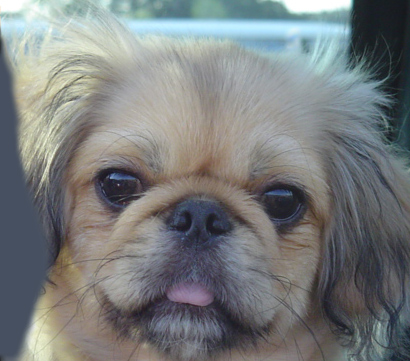

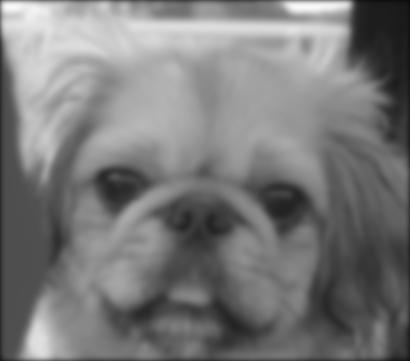

In [53]:
from PIL import Image
import matplotlib.pyplot as plt
# diaplay the original image
original = Image.open('dog.jpeg')
display(original)

# convert to grey scale image
greyscale = original.convert('L')
# convert to numpy double array
grescale_nparray = np.asarray(greyscale, np.float32)
# apply a 2d gaussian filter with sigma = 3 to the greyscale image
gauss_filtered = gaussconvolve2d_manual(grescale_nparray, 3)
gauss_filterd_int = Image.fromarray(gauss_filtered.astype('uint8'))
gauss_filterd_int.save('dog_gauss_filtered_manual.jpeg','jpeg')
filtered = Image.open('dog_gauss_filtered_manual.jpeg')
#display the image
display(filtered)

In [54]:
def gaussconvolve2d_scipy(array, sigma):
  filter = gauss2d(sigma)
  return signal.convolve2d(array,filter,'same')

Because in our case, gaussian filters are symmetrical.However, when the filter is not symmetrical, convolove2d and correlated2d will iterate the filter with opposite orders and have different results. Therefore, signal.convolve2d and signal.correlate2d will have the same results for our function but scipy seperate them into two functinos.

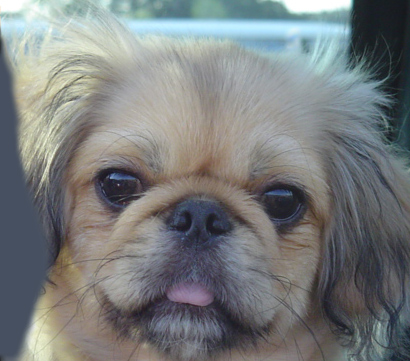

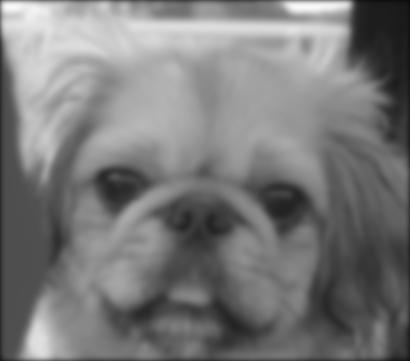

In [52]:
# diaplay the original image
original = Image.open('dog.jpeg')
display(original)

# apply a 2d gaussian filter with sigma = 3 to the greyscale image
gauss_filtered = gaussconvolve2d_scipy(grescale_nparray, 3)
gauss_filterd_int = Image.fromarray(gauss_filtered.astype('uint8'))
gauss_filterd_int.save('dog_gauss_filtered_scipy.jpeg','jpeg')
filtered = Image.open('dog_gauss_filtered_scipy.jpeg')
# display the filtered image
display(filtered)

In [21]:
import time

In [39]:
t1 = time.time() # start timestamp
gauss_filtered = gaussconvolve2d_manual(grescale_nparray, 10)
duration = time.time() - t1 # duration in seconds
print(duration)

1.7799246311187744


6.

In [56]:
t1 = time.time() # start timestamp
gauss_filtered = gaussconvolve2d_scipy(grescale_nparray, 10)
duration = time.time() - t1 # duration in seconds
print(duration)

1.7766072750091553


The gaussconvolve2d_scipy runs slightly shorter time than gaussconvolve2d_manual. They have the same gauss2d function to generate the filter. Therefore, the difference is mostly the convolve2d functions. It could be due to different algorithms. But generally speaking, they have almost the same performance for sigma = 10.0.

This is the comment in the source code of convolve2d:
Gaussian blur implemented using FFT convolution.  

    Notice the dark borders around the image, due to the zero-padding beyond its boundaries. The `convolve2d` function allows for other types of image boundaries,
    but is far slower.

By researching a bit into scipy, it provides another function called scipy.signal.convolve which provides an option for calculating direct convolution or fft convolution. The direct convolution is faster when size of the image and sigma are small while fft convolution works better when size of the image and sigma are big.

The reason why I am having certain results is that the number of operations is a fixed number. So the run time should be relatively certain.


7.

Taking advantage of the separability, we need to first sperate the 2d matrix into outer product of two 1D gaussian filter. Then apply each 1D gaussian filter to every pixel of the image.
When applying the 2D gaussian filter, the total multiplication would be m x m multiplications at each pixel and n x n pixels in total. So the total is m^2*n^2. However, when doing the 2D gaussian taking advantage of seperability, the total multiplication would be 2 x m at each pixel and n x n pixels in total. So the total is 2 x m x n^2. The run time complexity for implementation with seperability is more efficient.

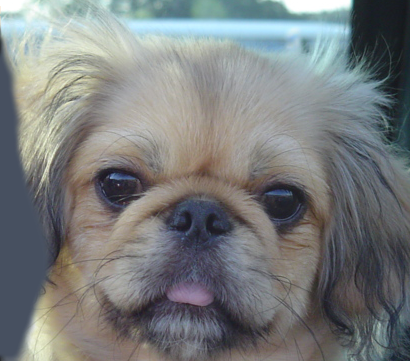

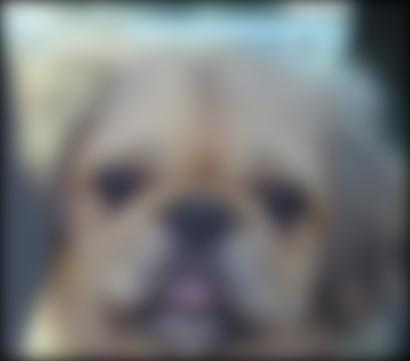

In [24]:
# open and display the original image
littledog = Image.open('littledog.jpeg')
display(littledog)

# convert the image to numpy double array
littledog_array = np.asarray(littledog, np.double)
# generate the output array
filtered_littledog_array = np.ndarray(littledog_array.shape)
# iterate over the RGB channels of the image and apply the gaussian filter
for channel in range (0, 3):
  channel_array = littledog_array[:,:,channel]
  filtered_channel_array = gaussconvolve2d_scipy(channel_array, 10)
  filtered_littledog_array[:,:,channel] = filtered_channel_array
# convert to unsigned nt array
filterd_littledog_int = Image.fromarray(filtered_littledog_array.astype('uint8'))
# save the image
filterd_littledog_int.save('littledog_filtered.jpeg','jpeg')
filtered_littledog = Image.open('littledog_filtered.jpeg')
#display the image
display(filtered_littledog)

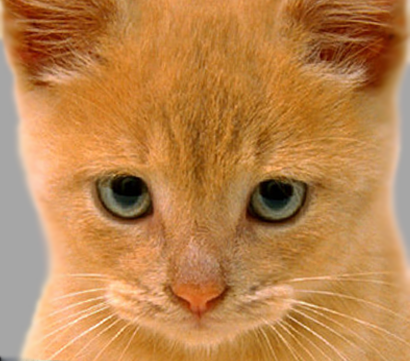

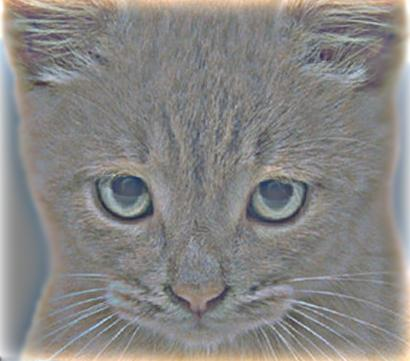

In [25]:
# open and display the original image
cat = Image.open('cat2.jpeg')
display(cat)

# convert the image to numpy double array
cat_array = np.asarray(cat, np.double)
# generate the output array
filtered_cat_array = np.ndarray(cat_array.shape)
# iterate over the RGB channels of the image and apply the gaussian filter
for channel in range (0, 3):
  channel_array = cat_array[:,:,channel]
  filtered_channel_array = gaussconvolve2d_scipy(channel_array, 10)
  filtered_cat_array[:,:,channel] = channel_array - filtered_channel_array
# add 128 and clamp to [0, 255] for visualization
filtered_cat_highfreq_array = np.clip((filtered_cat_array + 128.0), 0.0, 255.0)
# convert to unsigned nt array
filterd_cat_int = Image.fromarray(filtered_cat_highfreq_array.astype('uint8'))
# save the image
filterd_cat_int.save('cat_filtered.jpeg','jpeg')
filtered_cat = Image.open('cat_filtered.jpeg')
#display the image
display(filtered_cat)

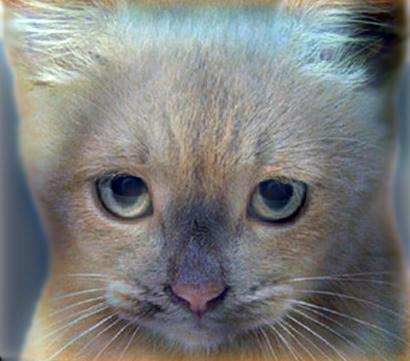

In [26]:
# open the image array
filtered_littledog = Image.open('littledog_filtered.jpeg')
# convert the array to numpy double array
highfreq_cat_array = filtered_cat_array
lowfreq_littledog_array = np.asarray(filtered_littledog, np.double)
# generate the output array
catdog_array = np.ndarray(cat_array.shape)
for channel in range (0, 3):
  lowfreq_channel = lowfreq_littledog_array[:,:,channel]
  highfreq_channel = highfreq_cat_array[:,:,channel]
  catdog_array[:,:,channel] = lowfreq_channel + highfreq_channel
#clamp to [0, 255] for visualization
adjusted_catdog_array = np.clip(catdog_array, 0.0, 255.0)
# convert to unsigned nt array
catdog_int = Image.fromarray(adjusted_catdog_array.astype('uint8'))
# save the image
catdog_int.save('catdog.jpeg','jpeg')
catdog = Image.open('catdog.jpeg')
#display the image
display(catdog)

In [27]:
def hybridimage(image_a, image_b, sigma, newimagename):
  # open and display the original image
  image_1 = Image.open(image_a)

  # convert the image to numpy double array
  image_1_array = np.asarray(image_1, np.double)
  # generate the output array
  filtered_image_1_array = np.ndarray(image_1_array.shape)

  # open and display the original image
  image_2 = Image.open(image_b)

  # convert the image to numpy double array
  image_2_array = np.asarray(image_2, np.double)
  # generate the output array
  hybrid_image_array = np.ndarray(image_2_array.shape)
  # iterate over the RGB channels of the image and apply the gaussian filter
  for channel in range (0, 3):
    channel_array_lo = image_1_array[:,:,channel]
    channel_array_hi = image_2_array[:,:,channel]
    filtered_channel_array_lo = gaussconvolve2d_scipy(channel_array_lo, sigma)
    filtered_channel_array_hi = gaussconvolve2d_scipy(channel_array_hi, sigma)
    hybrid_image_array[:,:,channel] = filtered_channel_array_lo + channel_array_hi - filtered_channel_array_hi

  #clamp to [0, 255] for visualization
  adjusted_hybrid_image_array = np.clip(hybrid_image_array, 0.0, 255.0)
  # convert to unsigned nt array
  hybrid_image_array_int = Image.fromarray(adjusted_hybrid_image_array.astype('uint8'))
  # save the image
  hybrid_image_array_int.save(newimagename + 'hybrid_image.jpeg','jpeg')
  hybrid_image = Image.open(newimagename + 'hybrid_image.jpeg')
  #display the image
  display(hybrid_image)

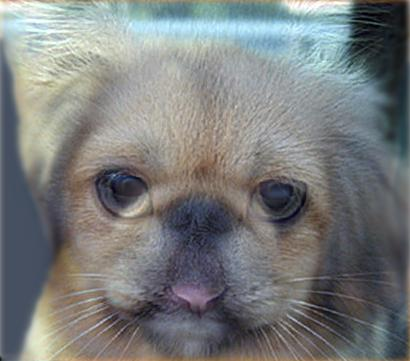

hybrid image generated with sigma = dogcat_3


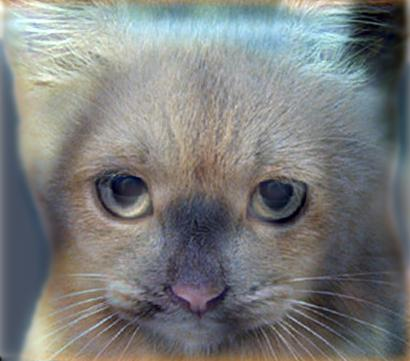

hybrid image generated with sigma = dogcat_6


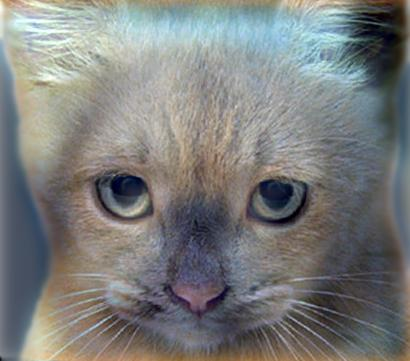

hybrid image generated with sigma = dogcat_9


In [28]:
for index in range(1, 4):
  sigma = 3 * index
  hybridimage('littledog.jpeg', 'cat2.jpeg', (sigma), 'dogcat' + str(index))
  print(f"hybrid image generated with sigma = dogcat_{sigma}")

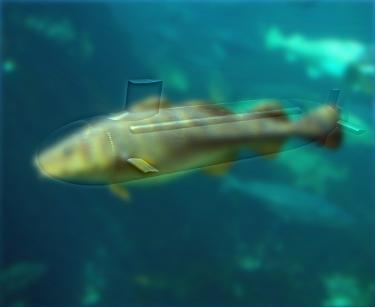

hybrid image generated with sigma = fishingsubmarine_3


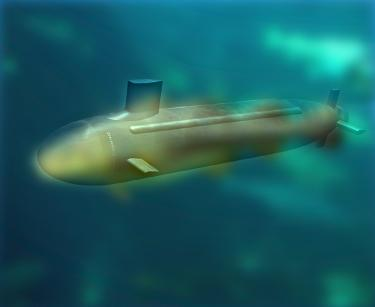

hybrid image generated with sigma = fishingsubmarine_6


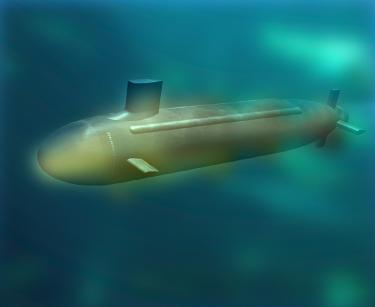

hybrid image generated with sigma = fishingsubmarine_9


In [29]:
for index in range(1, 4):
  sigma = 3 * index
  hybridimage('fish.bmp', 'submarine.bmp', (sigma), 'fishingsubmarine' + str(index))
  print(f"hybrid image generated with sigma = fishingsubmarine_{sigma}")

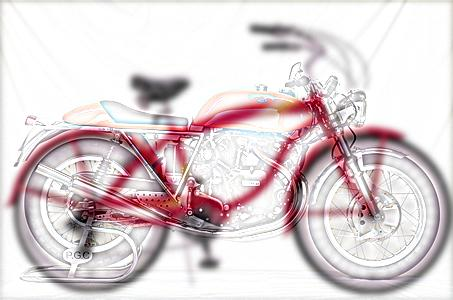

hybrid image generated with sigma = bimotorcycle_3


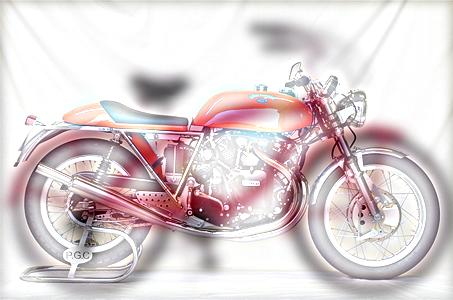

hybrid image generated with sigma = bimotorcycle_6


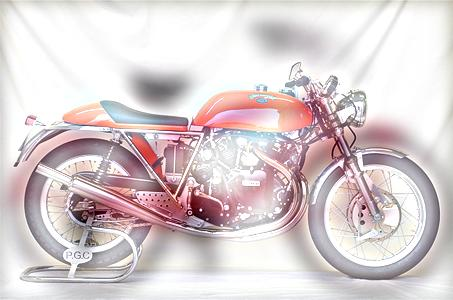

hybrid image generated with sigma = bimotorcycle_9


In [30]:
for index in range(1, 4):
  sigma = 3 * index
  hybridimage('bicycle.bmp', 'motorcycle.bmp', (sigma), 'bimotorcycle' + str(index))
  print(f"hybrid image generated with sigma = bimotorcycle_{sigma}")

box_gauss gaussian filtered with ksize = (101, 101), sigma = 5.0:


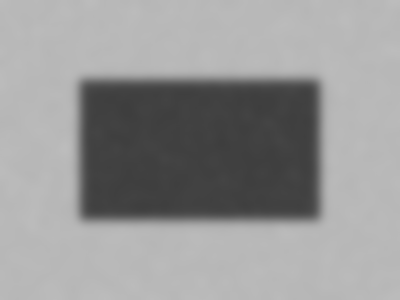

In [58]:
img_gauss_noise_array = cv2.imread('box_gauss.png')

# Gaussian noise
sigma = 5.0 # set Gaussian filter sigma
gaussian_ksize = (101, 101)
# denoising the image
gngf_array = cv2.GaussianBlur(src=img_gauss_noise_array, ksize=gaussian_ksize, sigmaX=sigma)
gngf_int = Image.fromarray(gngf_array.astype('uint8'))
gngf_int.save('box_gauss_gauss_filtered.png','png')
print(f"box_gauss gaussian filtered with ksize = {gaussian_ksize}, sigma = {sigma}:")
box_gngf = Image.open('box_gauss_gauss_filtered.png')
#display the image
display(box_gngf)

box_speckle gaussian filtered with ksize = (101, 101), sigma = 5.0:


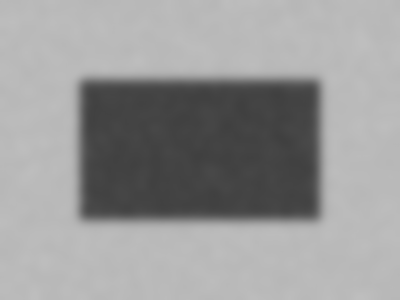

In [32]:
img_speckle_noise_array = cv2.imread('box_speckle.png')

# Speckle noise
sigma = 5.0 # set Gaussian filter sigma
gaussian_ksize = (101, 101)
# denoising the image
sngf_array = cv2.GaussianBlur(src=img_speckle_noise_array, ksize=gaussian_ksize, sigmaX=sigma)
sngf_int = Image.fromarray(sngf_array.astype('uint8'))
sngf_int.save('box_speckle_gauss_filtered.png','png')
print(f"box_speckle gaussian filtered with ksize = {gaussian_ksize}, sigma = {sigma}:")
box_sngf = Image.open('box_speckle_gauss_filtered.png')
#display the image
display(box_sngf)

box_gauss median filtered with ksize = 9:


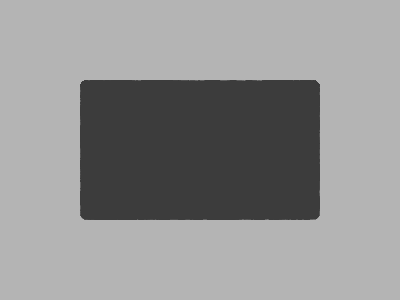

In [33]:
img_gauss_noise_array = cv2.imread('box_gauss.png')

# gaussian noise
median_ksize = 9
# denoising the image
gnmf_array = cv2.medianBlur(src=img_gauss_noise_array, ksize=median_ksize)
gnmf_int = Image.fromarray(gnmf_array.astype('uint8'))
gnmf_int.save('box_gauss_median_filtered.png','png')
print(f"box_gauss median filtered with ksize = {median_ksize}:")
box_gnmf = Image.open('box_gauss_median_filtered.png')
#display the image
display(box_gnmf)

box_speckle median filtered with ksize = 9:


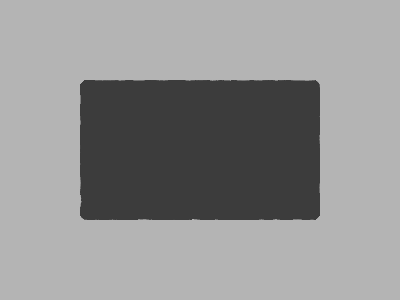

In [34]:
img_speckle_noise_array = cv2.imread('box_speckle.png')

# speckle noise
median_ksize = 9
# denoising the image
snmf_array = cv2.medianBlur(src=img_speckle_noise_array, ksize=median_ksize)
snmf_int = Image.fromarray(snmf_array.astype('uint8'))
snmf_int.save('box_speckle_median_filtered.png','png')
print(f"box_speckle median filtered with ksize = {median_ksize}:")
box_snmf = Image.open('box_speckle_median_filtered.png')
#display the image
display(box_snmf)

box_gauss bilateral filtered with ksize = 25, sigma_color = 253, sigma_space = 300:


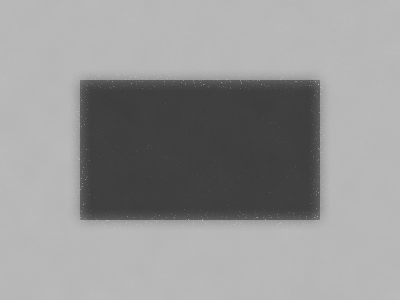

In [64]:
img_gauss_noise_array = cv2.imread('box_gauss.png')

# gaussian noise
bilateral_ksize = 25
bilateral_sigma_color = 253
bilateral_sigma_space = 300
# denoising the image
gnbf_array = cv2.bilateralFilter(src=img_gauss_noise_array, d=bilateral_ksize, sigmaColor=bilateral_sigma_color, sigmaSpace=bilateral_sigma_space)
gnbf_int = Image.fromarray(gnbf_array.astype('uint8'))
gnbf_int.save('box_gauss_bilateral_filtered.png','png')
print(f"box_gauss bilateral filtered with ksize = {bilateral_ksize}, sigma_color = {bilateral_sigma_color}, sigma_space = {bilateral_sigma_space}:")
box_gnbf = Image.open('box_gauss_bilateral_filtered.png')
#display the image
display(box_gnbf)

box_speckle bilateral filtered with ksize = 25, sigma_color = 253, sigma_space = 300:


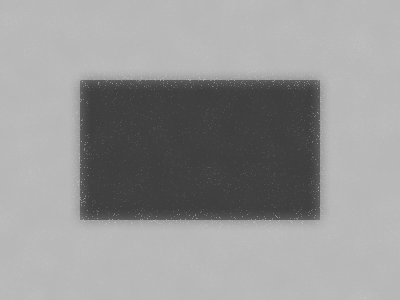

In [63]:
img_speckle_noise_array = cv2.imread('box_speckle.png')

# speckle noise
bilateral_ksize = 25
bilateral_sigma_color = 253
bilateral_sigma_space = 300
# denoising the image
snbf_array = cv2.bilateralFilter(src=img_speckle_noise_array, d=bilateral_ksize, sigmaColor=bilateral_sigma_color, sigmaSpace=bilateral_sigma_space)
snbf_int = Image.fromarray(snbf_array.astype('uint8'))
snbf_int.save('box_speckle_bilateral_filtered.png','png')
print(f"box_speckle bilateral filtered with ksize = {bilateral_ksize}, sigma_color = {bilateral_sigma_color}, sigma_space = {bilateral_sigma_space}:")
box_snbf = Image.open('box_speckle_bilateral_filtered.png')
#display the image
display(box_snbf)

box_gauss gaussian filtered with ksize = (7, 7), sigma = 50:


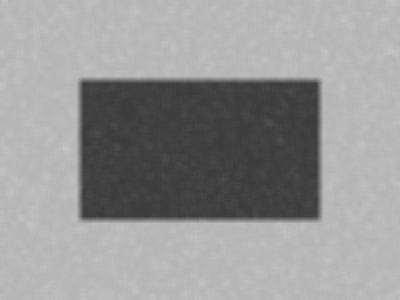

box_gauss bilateral filtered with ksize = 7, sigma_color = 150, sigma_space = 150:


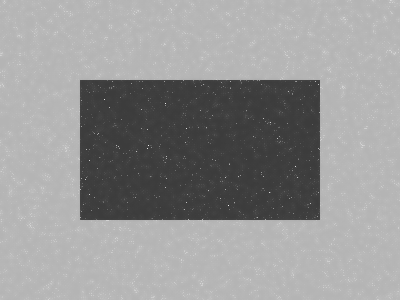

box_gauss median filtered with ksize = 7:


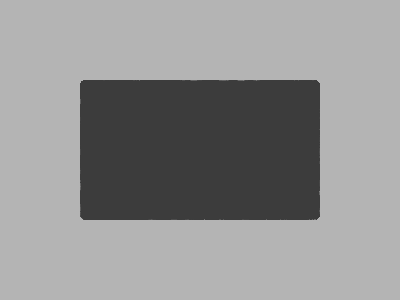

box_speckle gaussian filtered with ksize = (101, 101), sigma = 5.0:


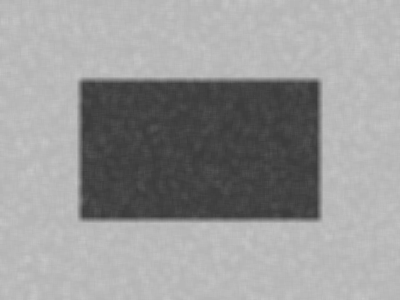

box_speckle bilateral filtered with ksize = 25, sigma_color = 255, sigma_space = 15:


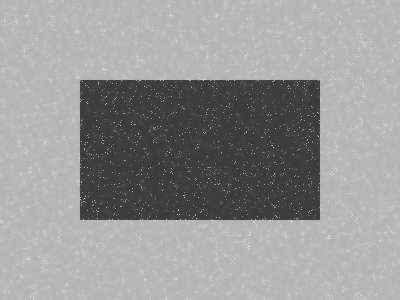

box_speckle median filtered with ksize = 9:


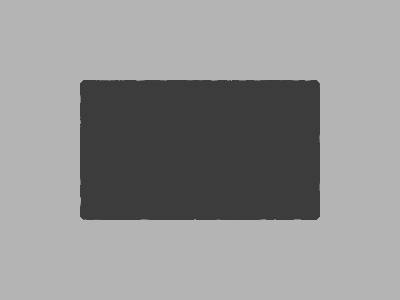

In [37]:
import cv2
img_gauss_noise_array = cv2.imread('box_gauss.png')
img_speckle_noise_array = cv2.imread('box_speckle.png')
# denoising the image
gngf_array = cv2.GaussianBlur(img_gauss_noise_array, ksize=(7, 7), sigmaX=50)
gngf_int = Image.fromarray(gngf_array.astype('uint8'))
gngf_int.save('box_gauss_gauss_filtered.png','png')
print("box_gauss gaussian filtered with ksize = (7, 7), sigma = 50:")
box_gngf = Image.open('box_gauss_gauss_filtered.png')
#display the image
display(box_gngf)
# denoising the image
gnbf_array = cv2.bilateralFilter(img_gauss_noise_array, 7, sigmaColor=150, sigmaSpace=150)
gnbf_int = Image.fromarray(gnbf_array.astype('uint8'))
gnbf_int.save('box_gauss_bilateral_filtered.png','png')
print("box_gauss bilateral filtered with ksize = 7, sigma_color = 150, sigma_space = 150:")
box_gnbf = Image.open('box_gauss_bilateral_filtered.png')
#display the image
display(box_gnbf)
# denoising the image
gnmf_array = cv2.medianBlur(img_gauss_noise_array,7)
gnmf_int = Image.fromarray(gnmf_array.astype('uint8'))
gnmf_int.save('box_gauss_median_filtered.png','png')
print("box_gauss median filtered with ksize = 7:")
box_gnmf = Image.open('box_gauss_median_filtered.png')
#display the image
display(box_gnmf)
# denoising the image
sngf_array = cv2.GaussianBlur(img_speckle_noise_array, ksize=(7, 7), sigmaX=50)
sngf_int = Image.fromarray(sngf_array.astype('uint8'))
sngf_int.save('box_speckle_gauss_filtered.png','png')
print(f"box_speckle gaussian filtered with ksize = {gaussian_ksize}, sigma = {sigma}:")
box_sngf = Image.open('box_speckle_gauss_filtered.png')
#display the image
display(box_sngf)
# denoising the image
snbf_array = cv2.bilateralFilter(img_speckle_noise_array, 7, sigmaColor=150, sigmaSpace=150)
snbf_int = Image.fromarray(snbf_array.astype('uint8'))
snbf_int.save('box_speckle_bilateral_filtered.png','png')
print(f"box_speckle bilateral filtered with ksize = {bilateral_ksize}, sigma_color = {bilateral_sigma_color}, sigma_space = {bilateral_sigma_space}:")
box_snbf = Image.open('box_speckle_bilateral_filtered.png')
#display the image
display(box_snbf)
# denoising the image
snmf_array = cv2.medianBlur(img_speckle_noise_array,7)
snmf_int = Image.fromarray(snmf_array.astype('uint8'))
snmf_int.save('box_speckle_median_filtered.png','png')
print(f"box_speckle median filtered with ksize = {median_ksize}:")
box_snmf = Image.open('box_speckle_median_filtered.png')
#display the image
display(box_snmf)

Gaussian Filter:
*   Pros: It can be separable so that it could be time effcient. The time complexity is O(m*n^2)
*   Cons: It loses fine details and sharp edges. It gets too blurry when sigma and kernel size are too large while the smoothing is not tangible when sigma and kernel size are too small.

Median Filter:
*   Pros: It can preserve sharp features while smoothing the noises. It can exclude the noises pixel by not including them in the sigma color range.
*   Cons: It is not as time efficient and the worse case time complexity could be O(mlog(m)*n^2).

Bilateral Filter:
*   Pros: It can preserve edge sharpness and fine details.
*   Cons: It could involve the white noise in black area too much because the pixel difference is too big so that it cannot efficiently denoise the noises. It is not as time efficient and since it is not separable, the time complexity should be O(m^2*n^2).

